In [1]:
% tensorflow_version 2.x

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
 from google.colab import files

In [5]:
uploaded=files.upload()

Saving voice.csv to voice.csv


In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [10]:
data['label']=pd.get_dummies(data['label'],drop_first=True)

In [12]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [16]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


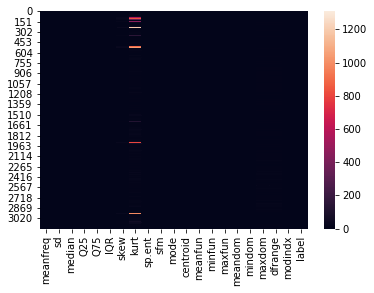

In [24]:
sns.heatmap(data)

In [29]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   uint

In [31]:
data['kurt']=data['kurt'].fillna(np.mean(data['kurt']))

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('label',axis=1), data['label'], test_size=0.30, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [49]:
lm=LogisticRegression()
dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=100)
kne=KNeighborsClassifier(n_neighbors=int(np.floor(np.sqrt(len(y_train)+len(y_test)))))
svm=SVC()

In [50]:
lm.fit(X_train,y_train)
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
kne.fit(X_train,y_train)
svm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
pred=lm.predict(X_test)
pdtree=dtree.predict(X_test)
prfc=rfc.predict(X_test)
pkne=kne.predict(X_test)
psvm=svm.predict(X_test)

In [43]:
 from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print('          Logistic Regression')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('\n')

print('          decision tree ')
print(confusion_matrix(y_test,pdtree))
print(classification_report(y_test,pdtree))
print('\n')

print('          Random Forest ')
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))
print('\n')

print('          KNearest Neighbors ')
print(confusion_matrix(y_test,pkne))
print(classification_report(y_test,pkne))
print('\n')

print('         SVM ')
print(confusion_matrix(y_test,psvm))
print(classification_report(y_test,psvm))
print('\n')

          Logistic Regression
[[378  79]
 [ 29 465]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       457
           1       0.85      0.94      0.90       494

    accuracy                           0.89       951
   macro avg       0.89      0.88      0.89       951
weighted avg       0.89      0.89      0.89       951



          decision tree 
[[432  25]
 [ 19 475]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       457
           1       0.95      0.96      0.96       494

    accuracy                           0.95       951
   macro avg       0.95      0.95      0.95       951
weighted avg       0.95      0.95      0.95       951



          Random Forest 
[[451   6]
 [  7 487]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       457
           1       0.99      0.99      0.99       494

    accuracy                 

In [55]:
# Random Forest is the Best Classifier for the Voice_gender dataset